In [4]:
#컴퓨팅사고와 데이터분석 기초 기말고사 대체 프로젝트 (산업경영공학과 12210618 신재우)

In [6]:
#Quantum Walk VS Random Walk

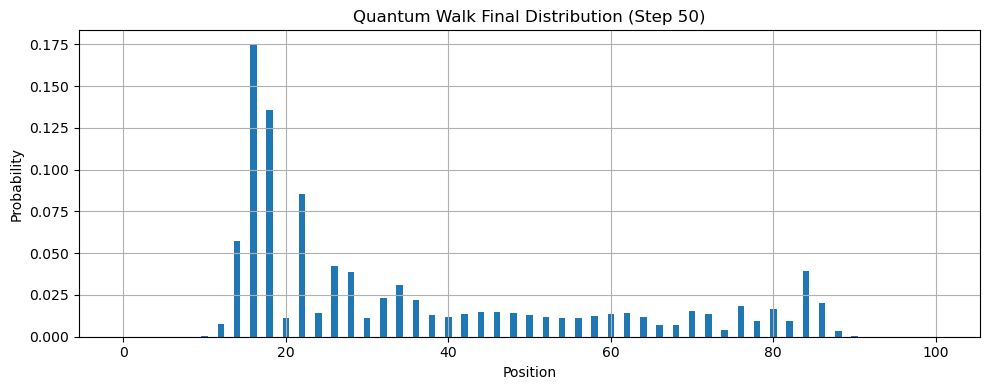

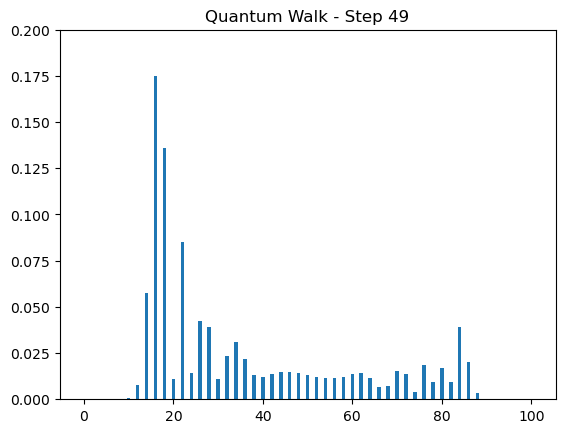

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1. 상태 초기화
def initialize_state(n_positions):
    state = np.zeros((2, n_positions), dtype=complex)
    mid = n_positions // 2
    state[0, mid] = 1.0
    return state

# 2. Hadamard 코인 연산자
def hadamard():
    return np.array([[1, 1], [1, -1]]) / np.sqrt(2)

# 3. 시프트 연산자
def shift_operator(state):
    shifted = np.zeros_like(state)
    shifted[0, :-1] = state[0, 1:]
    shifted[1, 1:] = state[1, :-1]
    return shifted

# 4. 한 스텝 실행
def quantum_step(state, coin_operator):
    for i in range(state.shape[1]):
        state[:, i] = coin_operator @ state[:, i]
    return shift_operator(state)

# 5. 시뮬레이션
def simulate_quantum_walk(n_steps=50, n_positions=101):
    state = initialize_state(n_positions)
    hadamard_gate = hadamard()
    states = []
    for _ in range(n_steps):
        state = quantum_step(state, hadamard_gate)
        prob = np.abs(state[0])**2 + np.abs(state[1])**2
        states.append(prob)
    return np.array(states)

# 실행
results = simulate_quantum_walk()
final_frame = results[-1]

# 히스토그램 저장
plt.figure(figsize=(10, 4))
plt.bar(range(len(final_frame)), final_frame)
plt.title("Quantum Walk Final Distribution (Step 50)")
plt.xlabel("Position")
plt.ylabel("Probability")
plt.grid(True)
plt.tight_layout()
plt.savefig("quantum_walk_final_distribution.png")  # 저장
plt.show()

# 애니메이션 (GIF) 저장
fig, ax = plt.subplots()
bar = ax.bar(range(len(final_frame)), results[0])
ax.set_ylim(0, 0.2)

def update(frame):
    for rect, h in zip(bar, results[frame]):
        rect.set_height(h)
    ax.set_title(f"Quantum Walk - Step {frame}")
    return bar

ani = animation.FuncAnimation(fig, update, frames=len(results), blit=True)
ani.save("quantum_walk_animation.gif", writer='pillow', fps=10)  # GIF로 저장